# Complejidad Algebraica y Analítica y Precisión Numérica

---

## Introducción

En el estudio de los métodos numéricos, es esencial comprender tanto la complejidad de los algoritmos utilizados como la precisión con la que se realizan los cálculos. Este notebook se centra en dos temas fundamentales:

1. **Complejidad Algebraica y Analítica:** Analiza el costo computacional de realizar operaciones matemáticas, tanto desde el punto de vista algebraico como analítico.

2. **Precisión Numérica:** Examina cómo la representación de números en computadoras afecta la exactitud de los cálculos y cómo manejar los errores numéricos.

---

## Parte 1: Complejidad Algebraica y Analítica

### ¿Qué es la Complejidad Algebraica?

La complejidad algebraica se refiere al número mínimo de operaciones aritméticas (suma, resta, multiplicación, división) necesarias para resolver un problema matemático, sin considerar el tamaño de los números involucrados.

### ¿Qué es la Complejidad Analítica?

La complejidad analítica considera no solo el número de operaciones, sino también la precisión requerida y el comportamiento de los algoritmos en términos de recursos computacionales, como tiempo y memoria, especialmente en función del tamaño de la entrada.

### Importancia en Métodos Numéricos

En métodos numéricos, la eficiencia de un algoritmo es crucial, especialmente cuando se trabaja con grandes conjuntos de datos o se requieren cálculos rápidos.

---



### 1. Operaciones Matemáticas Básicas <a name="operaciones-basicas"></a>

### Suma y Resta

- **Complejidad:** $O(1)$ por operación.
- **Explicación:** Las computadoras modernas pueden realizar sumas y restas en tiempo constante para números de tamaño fijo (por ejemplo, enteros de 32 bits o 64 bits).

### Multiplicación

- **Complejidad:** Varía según el tamaño de los números.
    - **Para enteros/flotantes de tamaño fijo:** $O(1)$
    - **Para números grandes con $n$ dígitos:** El algoritmo estándar es $O(n^2)$, pero existen algoritmos optimizados.

### División

- **Complejidad:** Similar a la multiplicación.
    - **Números de tamaño fijo:** $O(1)$
    - **Números grandes:** El algoritmo estándar es $O(n^2)$

### Exponenciación y Raíces

- **Exponenciación:**
    - **Método ingenuo:** $O(n)$ multiplicaciones para exponente  $n$
    - **Exponenciación por potenciación:** $O(\log n)$
- **Raíces (por ejemplo, raíces cuadradas):**
    - **Método de Newton-Raphson:** Método iterativo con complejidad dependiendo de la precisión deseada.

---

### 2. Funciones Matemáticas Complejas

### Logaritmos

- **Complejidad:** $O(1)$ para funciones implementadas en hardware.
- **Explicación:** La mayoría de las CPU tienen instrucciones integradas o bibliotecas optimizadas para funciones logarítmicas.

### Funciones Trigonométricas

- **Complejidad:** $O(1)$ usando implementaciones en hardware o software optimizado como los algoritmos CORDIC.

---

### 3. Operaciones con Matrices

### Suma y Resta de Matrices

- **Complejidad:** $O(n^2)$ para dos matrices $n \times n$.
- **Explicación:** Cada elemento se suma o resta individualmente.

```python
import numpy as np

def suma_matrices(A, B):
    return A + B
```

### Multiplicación de Matrices

- **Algoritmo Estándar:**
    - **Complejidad:**  $O(n^3)$
- **Algoritmos Optimizados:**
    - **Algoritmo de Strassen:** $O(n^{2.81})$
    - **Algoritmo de Coppersmith-Winograd:** Aproximadamente $O(n^{2.376})$

```python
def multiplicacion_matrices_estandar(A, B):
    return np.dot(A, B)
```

### Inversión de Matrices

- **Complejidad:** Aproximadamente $O(n^3)$
- **Explicación:** Involucra resolver $n$ sistemas lineales.

### Solución de Sistemas Lineales

- **Eliminación Gaussiana:**
    - **Complejidad:** $O(n^3)$
- **Descomposición LU:**
    - **Complejidad:** $O(n^3)$
- **Métodos Iterativos (por ejemplo, Gradiente Conjugado):**
    - **Complejidad:** Depende del sistema; a menudo $O(n^2)$ por iteración.

---

### 4. Algoritmos Avanzados <a name="algoritmos-avanzados"></a>

### Transformada Rápida de Fourier (FFT)

Transforma una secuencia en sus componentes de frecuencia de manera eficiente.

- **Complejidad:** $O(n \log n)$

```python
from numpy.fft import fft

def calcular_fft(señal):
    return fft(señal)
```

### Multiplicación de Matrices de Strassen

Reduce la complejidad de la multiplicación de matrices.

- **Complejidad:** $O(n^{2.81})$

---

### Ejemplo: Multiplicación de Matrices

Consideremos la multiplicación de dos matrices cuadradas de tamaño \( n \times n \).

#### Método Clásico

El método clásico requiere \( n^3 \) multiplicaciones.

In [2]:
import numpy as np

def multiplicacion_matrices_clasica(A, B):
    n = A.shape[0]
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]
    return C

**Complejidad Algebraica:** \( O(n^3) \)

#### Método de Strassen

El algoritmo de Strassen reduce el número de multiplicaciones a aproximadamente  $n^{2.81}$.

Se basa en el método Divide and Conquer

<p align="center">
<image src="strassen_new.png" alt="Descripción de la imagen">
</p>

Y usa el siguiente esquema


<p align="center">
<image src="stressen_formula_new_new.png" alt="Descripción de la imagen">
</p>

In [5]:
def multiplicacion_matrices_strassen(A, B):
    n = len(A)
    
    if n <= 2:  # Base case
        return np.dot(A, B)
    
    # Partition matrices into submatrices
    mid = n // 2
    A11 = A[:mid, :mid]
    A12 = A[:mid, mid:]
    A21 = A[mid:, :mid]
    A22 = A[mid:, mid:]
    B11 = B[:mid, :mid]
    B12 = B[:mid, mid:]
    B21 = B[mid:, :mid]
    B22 = B[mid:, mid:]
    
    # Recursive multiplication
    P1 = multiplicacion_matrices_strassen(A11, B12 - B22)
    P2 = multiplicacion_matrices_strassen(A11 + A12, B22)
    P3 = multiplicacion_matrices_strassen(A21 + A22, B11)
    P4 = multiplicacion_matrices_strassen(A22, B21 - B11)
    P5 = multiplicacion_matrices_strassen(A11 + A22, B11 + B22)
    P6 = multiplicacion_matrices_strassen(A12 - A22, B21 + B22)
    P7 = multiplicacion_matrices_strassen(A11 - A21, B11 + B12)
    
    # Combine results to form C
    C11 = P5 + P4 - P2 + P6
    C12 = P1 + P2
    C21 = P3 + P4
    C22 = P5 + P1 - P3 - P7
    
    # Combine quadrants to form C
    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
    return C

**Complejidad Algebraica:** Aproximadamente $O(n^{2.81})$

#### Comparación de Métodos

Veamos cómo se comportan ambos métodos en términos de tiempo de ejecución.

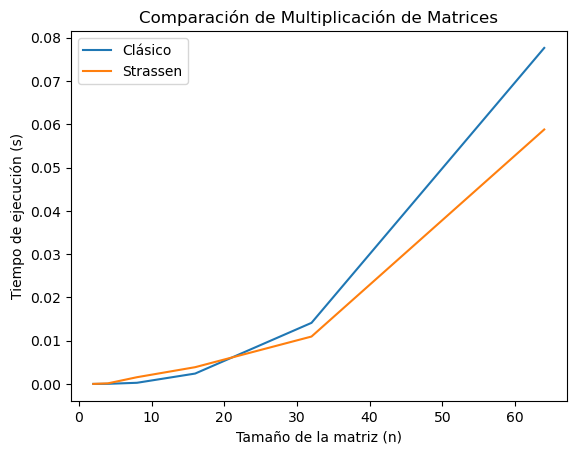

In [8]:
import time
import matplotlib.pyplot as plt

# Tamaños de matrices
tamaños = [2**i for i in range(1, 7)]
tiempos_clasico = []
tiempos_strassen = []

for n in tamaños:
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)
    
    # Método clásico
    inicio = time.time()
    multiplicacion_matrices_clasica(A, B)
    fin = time.time()
    tiempos_clasico.append(fin - inicio)
    
    # Método de Strassen
    inicio = time.time()
    multiplicacion_matrices_strassen(A, B)
    fin = time.time()
    tiempos_strassen.append(fin - inicio)

# Graficar resultados
plt.plot(tamaños, tiempos_clasico, label='Clásico')
plt.plot(tamaños, tiempos_strassen, label='Strassen')
plt.xlabel('Tamaño de la matriz (n)')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Comparación de Multiplicación de Matrices')
plt.legend()
plt.show()

**Nota:** La implementación de Strassen es recursiva y más eficiente para matrices grandes. Para matrices pequeñas, el overhead de la recursión puede hacerlo más lento que el método clásico.

---

### Complejidad en Solución de Sistemas Lineales

Resolver un sistema de ecuaciones lineales es una tarea común en métodos numéricos.

#### Método de Eliminación Gaussiana

**Complejidad Algebraica:** \( O(n^3) \)

In [4]:
def eliminacion_gaussiana(A, b):
    n = len(b)
    # Eliminación
    for k in range(n):
        for i in range(k+1, n):
            factor = A[i][k] / A[k][k]
            for j in range(k, n):
                A[i][j] -= factor * A[k][j]
            b[i] -= factor * b[k]
    # Sustitución hacia atrás
    x = [0 for _ in range(n)]
    for i in range(n-1, -1, -1):
        suma = sum(A[i][j] * x[j] for j in range(i+1, n))
        x[i] = (b[i] - suma) / A[i][i]
    return x

---

## Parte 2: Precisión Numérica

### Representación de Números en Computadora

Las computadoras utilizan el sistema de punto flotante para representar números reales, lo que introduce errores de redondeo y truncamiento.

### Sistema de Punto Flotante

Un número en punto flotante se representa como:

$$
\text{Número} = \pm (1 + \text{fracción}) \times 2^{\text{exponente}}
$$

### Precisión Simple y Doble

- **Precisión Simple (32 bits):** Aproximadamente 7 dígitos decimales significativos.
- **Precisión Doble (64 bits):** Aproximadamente 16 dígitos decimales significativos.

### Error de Redondeo y Machine Epsilon

El **epsilon de la máquina** $( \epsilon_{\text{máquina}} )$ es el número más pequeño tal que:

$$
1 + \epsilon_{\text{máquina}} \neq 1
$$

En Python, podemos encontrar este valor usando el módulo `sys`.


In [9]:
import sys
print("Epsilon de la máquina:", sys.float_info.epsilon)

Epsilon de la máquina: 2.220446049250313e-16


### Propagación de Errores

Los errores numéricos pueden acumularse y amplificarse en cálculos sucesivos.

#### Ejemplo: Suma de Números Pequeños y Grandes

In [12]:
# Suma de un número grande con números pequeños
suma = 1e16
for _ in range(1000):
    suma += 1e-3
print("Suma:", suma)

Suma: 1e+16


**Problema:** Los números pequeños pueden no afectar el resultado debido a la limitación en la precisión.

---

### Ejemplo Práctico: Cancelación Numérica

La cancelación numérica ocurre cuando se restan dos números muy cercanos, lo que resulta en una pérdida de dígitos significativos.

#### Ejemplo: Calcular 
$$
f(x) = \frac{1 - \cos(x)}{x^2} 
$$
para x pequeño

In [13]:
import numpy as np

def f_mal_condicionada(x):
    return (1 - np.cos(x)) / x**2

x_vals = np.logspace(-1, -10, 10)
f_vals = f_mal_condicionada(x_vals)

for x, f in zip(x_vals, f_vals):
    print(f"x = {x:.1e}, f(x) = {f:.5e}")

x = 1.0e-01, f(x) = 4.99583e-01
x = 1.0e-02, f(x) = 4.99996e-01
x = 1.0e-03, f(x) = 5.00000e-01
x = 1.0e-04, f(x) = 5.00000e-01
x = 1.0e-05, f(x) = 5.00000e-01
x = 1.0e-06, f(x) = 5.00044e-01
x = 1.0e-07, f(x) = 4.99600e-01
x = 1.0e-08, f(x) = 0.00000e+00
x = 1.0e-09, f(x) = 0.00000e+00
x = 1.0e-10, f(x) = 0.00000e+00


#### Solución: Usar Series de Taylor

Podemos utilizar la aproximación:

$$
1 - \cos(x) \approx \frac{x^2}{2} - \frac{x^4}{24} + \cdots
$$

Entonces:

$$
f(x) = \frac{1 - \cos(x)}{x^2} \approx \frac{1}{2} - \frac{x^2}{24} + \cdots
$$

In [8]:
def f_bien_condicionada(x):
    return 0.5 - x**2 / 24

f_vals_taylor = f_bien_condicionada(x_vals)

for x, f in zip(x_vals, f_vals_taylor):
    print(f"x = {x:.1e}, f(x) ≈ {f:.5e}")

x = 1.0e-01, f(x) ≈ 4.99583e-01
x = 1.0e-02, f(x) ≈ 4.99996e-01
x = 1.0e-03, f(x) ≈ 5.00000e-01
x = 1.0e-04, f(x) ≈ 5.00000e-01
x = 1.0e-05, f(x) ≈ 5.00000e-01
x = 1.0e-06, f(x) ≈ 5.00000e-01
x = 1.0e-07, f(x) ≈ 5.00000e-01
x = 1.0e-08, f(x) ≈ 5.00000e-01
x = 1.0e-09, f(x) ≈ 5.00000e-01
x = 1.0e-10, f(x) ≈ 5.00000e-01


**Observación:** La versión utilizando la serie de Taylor es más precisa para valores pequeños de $x$.